In [0]:
import networkx as nx
import pandas as pd
import io
print(pd.__version__)

0.25.3


IDEA: To build a Network architecture for Software - with modules and interfacs between them.

Input: csv file with input and output interface nodes. The modules(nodes) in between can be manually added on the go.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving values.csv to values (5).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['values.csv']), header=0)
# Now stored in a Pandas Dataframe
# H1 and H2 are intermediate nodes created for ease in csv file.
# H1 and H2 nodes can also be added after creating the dataframe

In [0]:
df

,valuei,I,H1,H2,valueo,O
0,1,input1,H1,H2,1,output1
1,2,input2,H1,H2,2,output2
2,3,input3,H1,H2,3,output3
3,4,input4,H1,H2,4,output4
4,5,input5,H1,H2,5,output5
5,6,input6,H1,H2,6,output6
6,7,input7,H1,H2,7,output7
7,8,input8,H1,H2,8,output8
8,9,input9,H1,H2,9,output9
9,10,input10,H1,H2,10,output10


1
5
['H', 'M', 'O', 1, 2]
[(1, 2)]


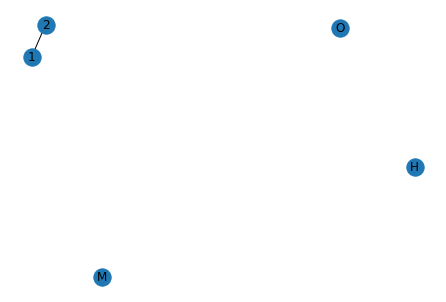

In [0]:
# Test Code! 
# To get a feeling of how the list of nodes and edges are created!

G = nx.Graph()
G.add_nodes_from(['H','M','O'])
G.nodes['H']['Label'] = 'H'
G.add_node(1)
G.add_edges_from([(1,2),(1,2)])
nx.draw(G, with_labels=True)


print(G.number_of_edges())
print(G.number_of_nodes())
print(G.nodes)
print(G.edges)

In [0]:
# Create a fresh graph and start afresh
# All inputs are connected to H1 and outputs to H2

G = nx.Graph()
input_subset = df[['I','H1']]
output_subset = df[['H2','O']]

# Create edges as Tuples from inputs and outputs
input_edges = [tuple(x) for x in input_subset.to_numpy()]
output_edges = [tuple(x) for x in output_subset.to_numpy()]

G.add_edges_from(input_edges)
G.add_edges_from(output_edges)
# Add a central Main node and connect the input and output branches 
G.add_node('Main')
G.add_edge('H1','Main')
G.add_edge('H2','Main')


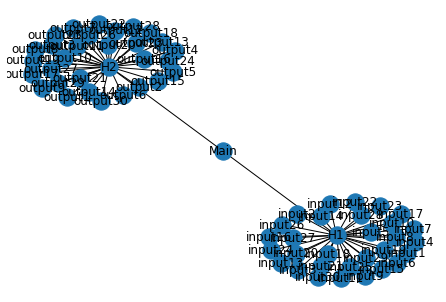

In [0]:
nx.draw_spring(G,with_labels=True)
# nx.draw defaults to draw_spring

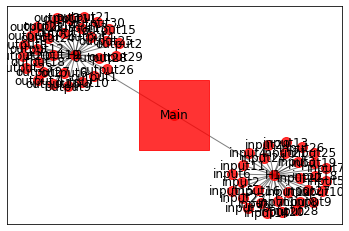

In [0]:
# Customizing the Network

pos = nx.layout.spring_layout(G)

# Define a central node - The "Main" block
# Node shapes are as in matplotlib.scatters shape  (Ref: https://matplotlib.org/3.1.3/api/markers_api.html)
nx.draw_networkx_nodes(G, pos = pos, nodelist=['Main'], node_color ='r', alpha=0.8, node_shape='s', with_labels=True, node_size=5000)
nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='r', alpha=0.8, node_shape='o', with_labels=True, node_size=100)

# Weighted nodes (TBD)
#nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='r', alpha=0.8, node_shape='.', with_labels=True, node_size=[counts[s] for s in G.nodes()])

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plot_info = nx.draw_networkx_labels(G, pos, labels=None)


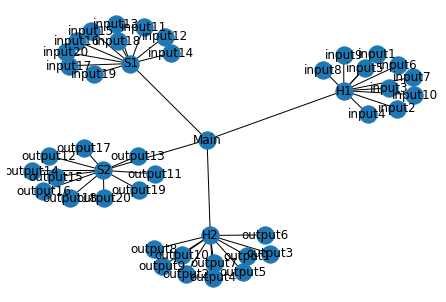

In [0]:
# New fresh graph for - Multiple input and output groups

G = nx.Graph()
input_subset1 = df.loc[0:9,['I','H1']]
output_subset1 = df.loc[0:9,['H2','O']]

# create a new columns for side nodes S1 and S2
df['S1'] = 'S1'
df['S2'] = 'S2'

input_subset2 = df.loc[10:19,['I','S1']]
output_subset2 = df.loc[10:19,['S2','O']]
# Create edges as Tuples from inputs and outputs
input_edges = [tuple(x) for x in input_subset1.to_numpy()]
output_edges = [tuple(x) for x in output_subset1.to_numpy()]


input_edges.extend(tuple(x) for x in input_subset2.to_numpy())
output_edges.extend([tuple(x) for x in output_subset2.to_numpy()])
# print(input_edges)

G.add_edges_from(input_edges)
G.add_edges_from(output_edges)
G.add_node('Main')
G.add_edge('H1','Main')
G.add_edge('H2','Main')
G.add_edge('S1', 'Main')
G.add_edge('S2', 'Main')
nx.draw(G, with_labels=True)


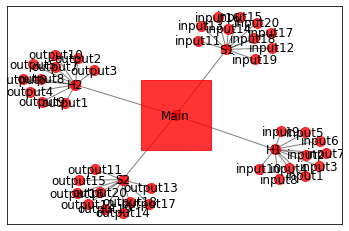

In [0]:
pos = nx.layout.spring_layout(G)

# Define a central node - The "Main" block
# Node shapes are as in matplotlib.scatters shape  (Ref: https://matplotlib.org/3.1.3/api/markers_api.html)
nx.draw_networkx_nodes(G, pos = pos, nodelist=['Main'], node_color ='r', alpha=0.8, node_shape='s', with_labels=True, node_size=5000)
nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='r', alpha=0.8, node_shape='o', with_labels=True, node_size=100)

# Weighted nodes (TBD)
#nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='r', alpha=0.8, node_shape='.', with_labels=True, node_size=[counts[s] for s in G.nodes()])

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plot_info = nx.draw_networkx_labels(G, pos, labels=None)

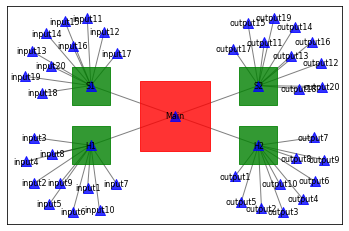

In [0]:
# Fix nodes at specific positions
# INTERESTING !!!
# S1 and H1 are inputs, S2 and H2 are outputs

fixed_pos = {'H1':(0,0), 'S1':(0,1), 'H2':(3,0), 'S2':(3,1)}
fixed_nodes = fixed_pos.keys()
#print(fixed_nodes)
pos = nx.spring_layout(G, pos=fixed_pos, fixed=fixed_nodes)


nx.draw_networkx_nodes(G, pos = pos, nodelist=['Main'], node_color ='r', alpha=0.8, node_shape='s', with_labels=True, node_size=5000)
nx.draw_networkx_nodes(G, pos = pos, nodelist=['S1','H1'], node_color ='g', alpha=0.8, node_shape='s', with_labels=True, node_size=1500)
nx.draw_networkx_nodes(G, pos = pos, nodelist=['S2','H2'], node_color ='g', alpha=0.8, node_shape='s', with_labels=True, node_size=1500)
nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='b', alpha=0.8, node_shape='^', with_labels=True, node_size=100)

# Weighted nodes (TBD)
#nx.draw_networkx_nodes(G, pos = pos, nodelist=G.nodes(), node_color ='r', alpha=0.8, node_shape='.', with_labels=True, node_size=[counts[s] for s in G.nodes()])

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plot_info = nx.draw_networkx_labels(G, pos, labels=None, font_size=8)

# TAA DAAAAA! :)
